In [1]:
import pandas

In [2]:
dfClientes = pandas.read_excel('caso_estudo.xlsx', sheet_name='clientes')
dfLojas = pandas.read_excel('caso_estudo.xlsx', sheet_name='lojas')
dfProdutos = pandas.read_excel('caso_estudo.xlsx', sheet_name='produtos')
dfVendas = pandas.read_excel('caso_estudo.xlsx', sheet_name='vendas')
dfPagamentos = pandas.read_excel('caso_estudo.xlsx', sheet_name='pagamentos')

# Analise Preliminar

In [3]:
dfClientes.sample(5)

,id,nome,sexo,dt_nasc
887,888,Melissa Castro,F,5/15/2002
943,944,Igor Santos,M,2/15/1975
623,624,Bianca Pereira,F,9/7/1952
216,217,Rafaela Almeida,F,7/25/2003
507,508,João Alves,M,9/29/1990


In [4]:
dfClientes.isnull().sum()

id         0
nome       4
sexo       4
dt_nasc    4
dtype: int64

In [5]:
dfClientes[dfClientes.isnull().T.any()]

,id,nome,sexo,dt_nasc
263,264,NaN,F,7/29/1997
264,265,NaN,M,2/7/1979
268,269,NaN,F,NaN
269,270,NaN,M,NaN
276,277,Brenda Santos,F,NaN
282,283,Amanda Barros,F,NaN
287,288,Victor Ribeiro,NaN,12/17/1974
290,291,Clara Pinto,NaN,12/25/1980
294,295,Tiago Lima,NaN,7/26/1973
301,302,Guilherme Cardoso,NaN,3/9/1998


In [6]:
dfClientes.sexo.unique()

array(['F', 'M', nan], dtype=object)

In [7]:
dfProdutos

,id,produto,valor
0,1,mouse,20.0
1,2,teclado,30.0
2,3,laptop básico,2300.0
3,4,laptop gamer,5300.0
4,5,monitor,1500.0
5,6,impressora,700.0
6,7,carregador,150.0
7,8,cadeira,540.0
8,9,mesa,860.0
9,10,xxx-231a,3211352.0


<AxesSubplot:>

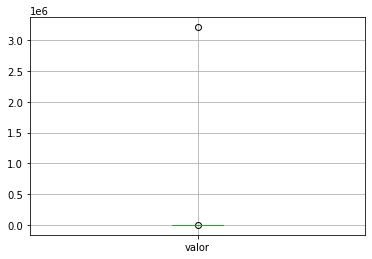

In [8]:
dfProdutos.boxplot(column=['valor'])

In [9]:
dfProdutos[dfProdutos.valor>3000000]

,id,produto,valor
9,10,xxx-231a,3211352.0


<AxesSubplot:>

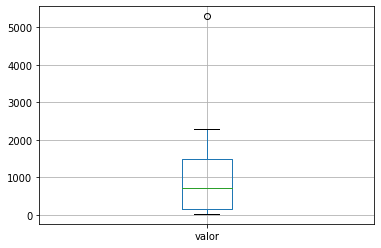

In [10]:
dfProdutos[dfProdutos.valor < 3000000].boxplot(column=['valor'])

In [11]:
dfVendas[dfVendas.id_produto == 10].count()

id            182
id_cliente    182
id_loja       182
id_produto    182
dt_venda      182
dtype: int64

In [12]:
dfVendas.describe()

,id,id_cliente,id_loja,id_produto
count,3000.000000,3000.000000,3000.000000,3000.000000
mean,1500.500000,500.763667,4.538333,4.435000
std,866.169729,285.322282,2.922221,2.511018
min,1.000000,1.000000,1.000000,1.000000
25%,750.750000,254.750000,2.000000,3.000000
50%,1500.500000,503.500000,4.000000,3.000000
75%,2250.250000,742.000000,7.000000,6.000000
max,3000.000000,1000.000000,10.000000,10.000000


In [13]:
dfPagamentos.describe()

,id,id_venda
count,2072.000000,2072.000000
mean,1036.500000,1491.731660
std,598.279199,864.865583
min,1.000000,1.000000
25%,518.750000,746.250000
50%,1036.500000,1501.500000
75%,1554.250000,2220.500000
max,2072.000000,2997.000000


# Data Cleaning

## Dados nulos

In [16]:
dfClientes.loc[dfClientes.nome.isnull(), 'nome'] = 'Sem nome'
dfClientes.loc[dfClientes.sexo.isnull(), 'sexo'] = 'O'
dfClientes.loc[dfClientes.dt_nasc.isnull(), 'dt_nasc'] = '1/1/2021'

In [19]:
dfClientes.loc[[269, 287], :]

,id,nome,sexo,dt_nasc
269,270,Sem nome,M,1/1/2021
287,288,Victor Ribeiro,O,12/17/1974


In [20]:
dfClientes.isnull().sum()

id         0
nome       0
sexo       0
dt_nasc    0
dtype: int64

## Outliers

In [21]:
dfProdutos.loc[9, 'valor'] = dfProdutos.valor[9]/10000
dfProdutos

,id,produto,valor
0,1,mouse,20.0000
1,2,teclado,30.0000
2,3,laptop básico,2300.0000
3,4,laptop gamer,5300.0000
4,5,monitor,1500.0000
5,6,impressora,700.0000
6,7,carregador,150.0000
7,8,cadeira,540.0000
8,9,mesa,860.0000
9,10,xxx-231a,321.1352


<AxesSubplot:>

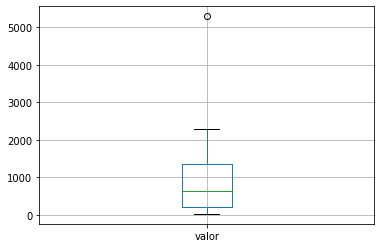

In [23]:
dfProdutos.boxplot(column=['valor'])

## Consistencia

In [27]:
dfVendas[~dfVendas.id_cliente.isin(dfClientes.id)]

,id,id_cliente,id_loja,id_produto,dt_venda


In [29]:
dfVendas[~dfVendas.id_loja.isin(dfLojas.id)]

,id,id_cliente,id_loja,id_produto,dt_venda


In [30]:
dfVendas[~dfVendas.id_produto.isin(dfProdutos.id)]

,id,id_cliente,id_loja,id_produto,dt_venda


In [33]:
dfPagamentos[~dfPagamentos.id_venda.isin(dfVendas.id)]

,id,id_venda,dt_pgto


In [35]:
dfVendas[~dfVendas.id.isin(dfPagamentos.id_venda)].count()

id            928
id_cliente    928
id_loja       928
id_produto    928
dt_venda      928
dtype: int64

## Dados duplicados

In [46]:
dfClientes[dfClientes.nome.duplicated()]

,id,nome,sexo,dt_nasc
79,80,Anna Melo,F,8/10/1999
96,97,Beatrice Goncalves,F,11/22/1964
138,139,Kauê Araujo,M,5/31/1974
139,140,Leonor Sousa,F,8/2/1981
154,155,Luis Rodrigues,M,7/3/1973
...,...,...,...,...
986,987,Beatriz Cardoso,F,7/17/1984
990,991,Diogo Melo,M,7/24/2001
993,994,Eduardo Costa,M,12/18/1963
996,997,Laura Oliveira,F,6/15/1979


In [47]:
dfClientes[dfClientes.nome == 'Anna Melo']

,id,nome,sexo,dt_nasc
66,67,Anna Melo,F,11/6/1995
79,80,Anna Melo,F,8/10/1999


In [49]:
dfClientes.drop('id', axis=1).duplicated().sum()

0

In [50]:
dfProdutos.produto.duplicated().sum()

0

In [51]:
dfLojas.cidade.duplicated().sum()

0

In [55]:
dfVendas[dfVendas.drop('id', axis=1).duplicated()]

,id,id_cliente,id_loja,id_produto,dt_venda
496,497,559,2,5,2018-06-22


In [56]:
dfVendas[(dfVendas.id_cliente == 559) & (dfVendas.id_loja ==2 ) & (dfVendas.id_produto == 5)]

,id,id_cliente,id_loja,id_produto,dt_venda
495,496,559,2,5,2018-06-22
496,497,559,2,5,2018-06-22


In [57]:
dfPagamentos.drop('id', axis=1).duplicated().sum()

0

## Formato de data

In [58]:
dfClientes.dt_nasc = pandas.to_datetime(dfClientes.dt_nasc, format='%m/%d/%Y')
dfClientes

,id,nome,sexo,dt_nasc
0,1,Lavinia Sousa,F,1975-05-02
1,2,Caio Pereira,M,1978-04-16
2,3,Júlio Azevedo,M,1952-11-04
3,4,Sarah Goncalves,F,1937-02-24
4,5,Gabrielle Martins,F,1953-05-06
...,...,...,...,...
995,996,Ágatha Ribeiro,F,1946-02-08
996,997,Laura Oliveira,F,1979-06-15
997,998,Lara Oliveira,F,1946-03-15
998,999,Julian Cunha,M,1994-06-20


## Indexes

In [59]:
dfClientes = dfClientes.set_index('id')
dfClientes

,nome,sexo,dt_nasc
id,,,
1,Lavinia Sousa,F,1975-05-02
2,Caio Pereira,M,1978-04-16
3,Júlio Azevedo,M,1952-11-04
4,Sarah Goncalves,F,1937-02-24
5,Gabrielle Martins,F,1953-05-06
...,...,...,...
996,Ágatha Ribeiro,F,1946-02-08
997,Laura Oliveira,F,1979-06-15
998,Lara Oliveira,F,1946-03-15


In [60]:
dfLojas = dfLojas.set_index('id')
dfProdutos = dfProdutos.set_index('id')
dfVendas = dfVendas.set_index('id')
dfPagamentos = dfPagamentos.set_index('id')

In [63]:
dfProdutos

,produto,valor
id,,
1,mouse,20.0000
2,teclado,30.0000
3,laptop básico,2300.0000
4,laptop gamer,5300.0000
5,monitor,1500.0000
6,impressora,700.0000
7,carregador,150.0000
8,cadeira,540.0000
9,mesa,860.0000


# Data Fusion

In [68]:
df = dfVendas.join(dfClientes.add_prefix('cliente_'), on='id_cliente')
df = df.join(dfLojas.add_prefix('loja_'), on='id_loja')
df = df.join(dfProdutos.add_prefix('produto_'), on='id_produto')

In [69]:
df

,id_cliente,id_loja,id_produto,dt_venda,cliente_nome,cliente_sexo,cliente_dt_nasc,loja_cidade,produto_produto,produto_valor
id,,,,,,,,,,
1,393,9,3,2018-01-04,Gustavo Silva,M,1950-01-04,Palmas,laptop básico,2300.0
2,417,9,3,2018-01-04,Leonor Almeida,F,1972-01-31,Palmas,laptop básico,2300.0
3,374,7,8,2018-01-04,André Alves,M,1962-08-03,Salvador,cadeira,540.0
4,59,4,3,2018-01-05,Rodrigo Ribeiro,M,1941-11-05,Belo Horizonte,laptop básico,2300.0
5,18,9,1,2018-01-05,Antônio Azevedo,M,1941-04-15,Palmas,mouse,20.0
...,...,...,...,...,...,...,...,...,...,...
2996,671,3,7,2020-09-27,Ana Goncalves,F,1999-10-31,Curitiba,carregador,150.0
2997,586,8,3,2020-09-27,Aline Pinto,F,1994-03-29,Brasília,laptop básico,2300.0
2998,731,2,4,2020-09-27,Otávio Silva,M,1986-05-04,Rio de Janeiro,laptop gamer,5300.0


In [72]:
df = df.join(dfPagamentos.set_index('id_venda'))

In [73]:
df

,id_cliente,id_loja,id_produto,dt_venda,cliente_nome,cliente_sexo,cliente_dt_nasc,loja_cidade,produto_produto,produto_valor,dt_pgto
id,,,,,,,,,,,
1,393,9,3,2018-01-04,Gustavo Silva,M,1950-01-04,Palmas,laptop básico,2300.0,2018-01-24
2,417,9,3,2018-01-04,Leonor Almeida,F,1972-01-31,Palmas,laptop básico,2300.0,2018-02-17
3,374,7,8,2018-01-04,André Alves,M,1962-08-03,Salvador,cadeira,540.0,2018-02-14
4,59,4,3,2018-01-05,Rodrigo Ribeiro,M,1941-11-05,Belo Horizonte,laptop básico,2300.0,NaT
5,18,9,1,2018-01-05,Antônio Azevedo,M,1941-04-15,Palmas,mouse,20.0,2018-01-23
...,...,...,...,...,...,...,...,...,...,...,...
2996,671,3,7,2020-09-27,Ana Goncalves,F,1999-10-31,Curitiba,carregador,150.0,2020-10-17
2997,586,8,3,2020-09-27,Aline Pinto,F,1994-03-29,Brasília,laptop básico,2300.0,2020-10-02
2998,731,2,4,2020-09-27,Otávio Silva,M,1986-05-04,Rio de Janeiro,laptop gamer,5300.0,NaT


# Feature Engineering

In [76]:
df['pg'] = 1
df.loc[df.dt_pgto.isnull(), 'pg'] = 0

In [77]:
df['tempo_pg'] = (df.dt_pgto - df.dt_venda).dt.days
df

,id_cliente,id_loja,id_produto,dt_venda,cliente_nome,cliente_sexo,cliente_dt_nasc,loja_cidade,produto_produto,produto_valor,dt_pgto,pg,tempo_pg
id,,,,,,,,,,,,,
1,393,9,3,2018-01-04,Gustavo Silva,M,1950-01-04,Palmas,laptop básico,2300.0,2018-01-24,1,20.0
2,417,9,3,2018-01-04,Leonor Almeida,F,1972-01-31,Palmas,laptop básico,2300.0,2018-02-17,1,44.0
3,374,7,8,2018-01-04,André Alves,M,1962-08-03,Salvador,cadeira,540.0,2018-02-14,1,41.0
4,59,4,3,2018-01-05,Rodrigo Ribeiro,M,1941-11-05,Belo Horizonte,laptop básico,2300.0,NaT,0,NaN
5,18,9,1,2018-01-05,Antônio Azevedo,M,1941-04-15,Palmas,mouse,20.0,2018-01-23,1,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2996,671,3,7,2020-09-27,Ana Goncalves,F,1999-10-31,Curitiba,carregador,150.0,2020-10-17,1,20.0
2997,586,8,3,2020-09-27,Aline Pinto,F,1994-03-29,Brasília,laptop básico,2300.0,2020-10-02,1,5.0
2998,731,2,4,2020-09-27,Otávio Silva,M,1986-05-04,Rio de Janeiro,laptop gamer,5300.0,NaT,0,NaN


In [81]:
import numpy
df['cliente_idade'] = numpy.floor((pandas.to_datetime('today') - df.cliente_dt_nasc)/numpy.timedelta64(1,'Y'))
df

,id_cliente,id_loja,id_produto,dt_venda,cliente_nome,cliente_sexo,cliente_dt_nasc,loja_cidade,produto_produto,produto_valor,dt_pgto,pg,tempo_pg,cliente_idade
id,,,,,,,,,,,,,,
1,393,9,3,2018-01-04,Gustavo Silva,M,1950-01-04,Palmas,laptop básico,2300.0,2018-01-24,1,20.0,71.0
2,417,9,3,2018-01-04,Leonor Almeida,F,1972-01-31,Palmas,laptop básico,2300.0,2018-02-17,1,44.0,49.0
3,374,7,8,2018-01-04,André Alves,M,1962-08-03,Salvador,cadeira,540.0,2018-02-14,1,41.0,58.0
4,59,4,3,2018-01-05,Rodrigo Ribeiro,M,1941-11-05,Belo Horizonte,laptop básico,2300.0,NaT,0,NaN,79.0
5,18,9,1,2018-01-05,Antônio Azevedo,M,1941-04-15,Palmas,mouse,20.0,2018-01-23,1,18.0,80.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2996,671,3,7,2020-09-27,Ana Goncalves,F,1999-10-31,Curitiba,carregador,150.0,2020-10-17,1,20.0,21.0
2997,586,8,3,2020-09-27,Aline Pinto,F,1994-03-29,Brasília,laptop básico,2300.0,2020-10-02,1,5.0,27.0
2998,731,2,4,2020-09-27,Otávio Silva,M,1986-05-04,Rio de Janeiro,laptop gamer,5300.0,NaT,0,NaN,34.0


# Analises

In [86]:
graf_dados = df.groupby('loja_cidade').count().produto_valor.sort_values(ascending=False)
graf_dados

loja_cidade
Rio de Janeiro    1087
Salvador           234
Vitória            231
Brasília           223
Belo Horizonte     221
Recife             211
São Paulo          207
Palmas             202
Curitiba           193
Santa Catarina     191
Name: produto_valor, dtype: int64

Text(0.5, 1.0, 'Vendas por loja')

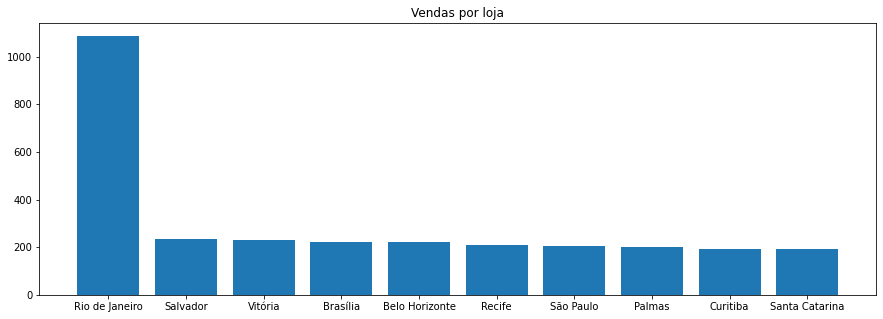

In [87]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
plt.bar(graf_dados.index, graf_dados.values)
plt.title('Vendas por loja')

## Produtos que mais vendem